In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl
import pandas as pd
import numpy as np
import xgboost
import pickle
import shap
import os

# Load data
X, y = shap.datasets.adult()

# human readable feature values
X_display, y_display = shap.datasets.adult(display=True)

def cache_train(train_fn, cache_path, X, y):
    """Cached version of training a model.

    Args:
      train_fn: function to train and return a model based on X and y.
      cache_path: path the cache the model.
      X: training inputs.
      y: training labels.

    Returns:
      model: trained model (may be loaded from cache).
    """
    if not os.path.exists(cache_path):
        os.makedirs(cache_path)

    model_name = cache_path + "model.pkl"
    if not os.path.exists(model_name):
        model = train_fn(X, y)
        pickle.dump(model, open(model_name, "wb"))
    else:
        model = pickle.load(open(model_name, "rb"))

    return model

def train_fn(X, y):
    xgb_full = xgboost.DMatrix(X, label=y)    

    params = {"objective": "binary:logistic"}
    model = xgboost.train(params, xgb_full, 200, evals = [(xgb_full, "test")])

    return(model)

exp_name = 'adult_concept'
cache_path = f'cache/{exp_name}/'
model = cache_train(train_fn, cache_path, X, y)

In [67]:
phi_path = cache_path + 'phi.p'

if not os.path.exists(phi_path):
    
    phi = shap.Explainer(model, X)(X)
    pickle.dump(phi, open(phi_path, 'wb'))
    
else:
    
    phi = pickle.load(open(phi_path, 'rb'))

 99%|===================| 32364/32561 [02:57<00:01]        

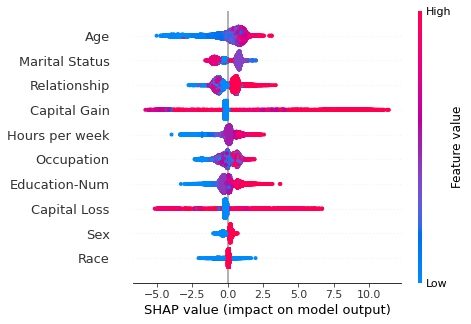

In [131]:
import matplotlib.pyplot as plt

shap.summary_plot(phi, X, max_display = 10, plot_size='auto', show=False)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 5)

plt.savefig(cache_path + 'summary_plot.pdf')
plt.show()

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


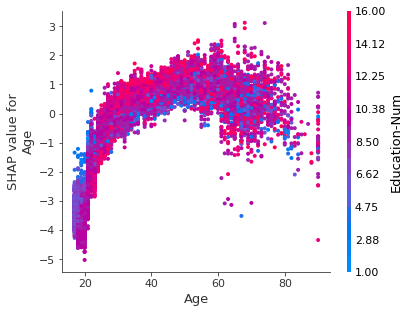

In [130]:
import matplotlib

shap.dependence_plot('Age', phi.values, X_display, show=False)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 4.8)

plt.savefig(cache_path + 'dependence_plot.pdf')
plt.show()

In [85]:
X_display.iloc[1]

Age                              50.0
Workclass            Self-emp-not-inc
Education-Num                    13.0
Marital Status     Married-civ-spouse
Occupation            Exec-managerial
Relationship                  Husband
Race                            White
Sex                              Male
Capital Gain                      0.0
Capital Loss                      0.0
Hours per week                   13.0
Country                 United-States
Name: 1, dtype: object

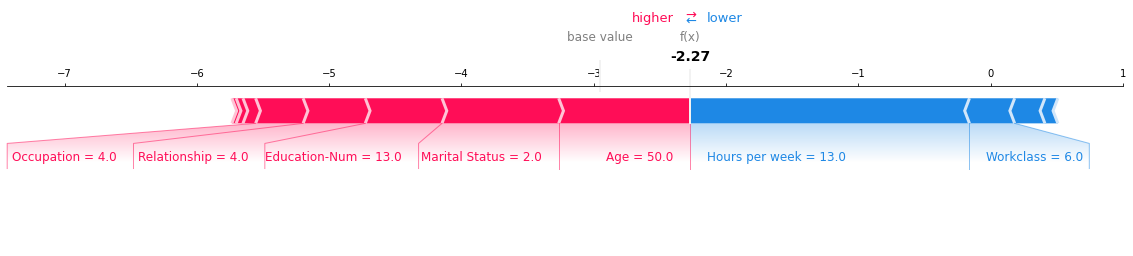

In [126]:
shap.force_plot(phi[1], 6, matplotlib=True, show=False)
plt.savefig(cache_path + 'waterfall_plot.pdf')
plt.show()

### Save stars from SHAP github repo

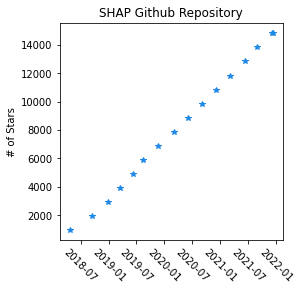

In [33]:
from matplotlib.pyplot import figure
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd

figure(figsize=(4, 4))
stars = pd.read_csv('star-history.csv', header=None, 
                    names=['package', 'date', 'count'])
dates = []

for d in stars['date']:
    date_string = ' '.join(d.split(' ')[:4])
    datetime_object = datetime.strptime(date_string, '%a %b %d %Y')
    dates.append(datetime_object)
    
plt.plot(dates, stars['count'], '*', color='#1e88e5')
plt.xticks(rotation=-45)
plt.title('SHAP Github Repository')
# plt.xlabel('Date')
plt.ylabel('# of Stars')
# plt.tight_layout()
plt.savefig('shap_stars.pdf')
plt.show()

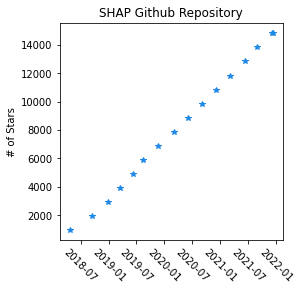

In [33]:
from matplotlib.pyplot import figure
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd

figure(figsize=(4, 4))
stars = pd.read_csv('star-history.csv', header=None, 
                    names=['package', 'date', 'count'])
dates = []

for d in stars['date']:
    date_string = ' '.join(d.split(' ')[:4])
    datetime_object = datetime.strptime(date_string, '%a %b %d %Y')
    dates.append(datetime_object)
    
plt.plot(dates, stars['count'], '*', color='#1e88e5')
plt.xticks(rotation=-45)
plt.title('SHAP Github Repository')
# plt.xlabel('Date')
plt.ylabel('# of Stars')
# plt.tight_layout()
plt.savefig('shap_stars.pdf')
plt.show()